In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

from IPython.core.display import HTML
import scipy
from scipy.io import wavfile
from scipy.fft import fft


In [2]:
def wavPlayer(filepath):
    """ displays HTML 5 player that may not be fully compatible with all browsers
    https://nbviewer.jupyter.org/gist/Carreau/5507501/the%20sound%20of%20hydrogen.ipynb
 """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [3]:
soundFile = wave.open('./DSP_sound00.wav', 'r')

In [4]:
# Pull 16-bit amplitude time sequence from wav file.
# What range of numeric values would this precision give?
signal = soundFile.readframes(-1)
signal = np.frombuffer(signal, dtype='int16')
fs = soundFile.getframerate()

In [5]:
# Only mono sound supported with this example.
if soundFile.getnchannels() != 1:
    print("Only mono sound supported here but could be modified.")
    sys.exit(0)

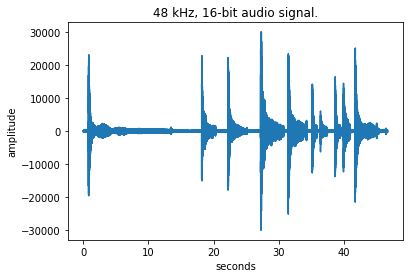

In [6]:
# Generate a sequence that matches for time stamps for plots.
Time = np.linspace(0, len(signal) / fs, num=len(signal))
# Figure 1: amplitude of full time sequence.
plt.figure(1)
plt.title("48 kHz, 16-bit audio signal.")
plt.plot(Time, signal)
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()

(1) Identify the musical note in the first sound and used in the example that I provided.  Support your answer.

In [7]:
index11 =30000
index12 = index11 + 200000# this would be a 200000 * ts time period 

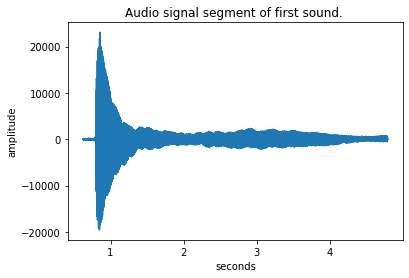

In [8]:
# Figure 2:  amplitude of first sound'.
plt.figure(2)
plt.title("Audio signal segment of first sound. ")
Time2 = Time[index11:index12]
signal2 = signal[index11:index12]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time2, signal2)
plt.show()

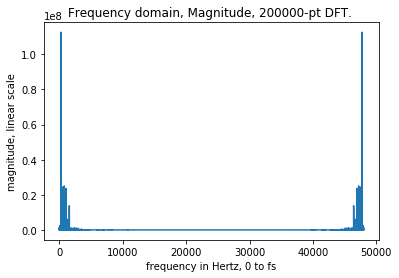

In [9]:

Xm = fft(signal2) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 3:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(3)
plt.title("Frequency domain, Magnitude, 200000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

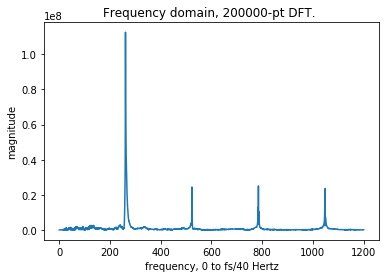

In [10]:
Xm = fft(signal2) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 4:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 40 # zoom = 40 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freq = np.linspace(0, fs/zoom, len(Xm_half))

plt.figure(4)
plt.title("Frequency domain, 200000-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/40 Hertz')
plt.plot(Freq, abs(Xm_half))
plt.show()

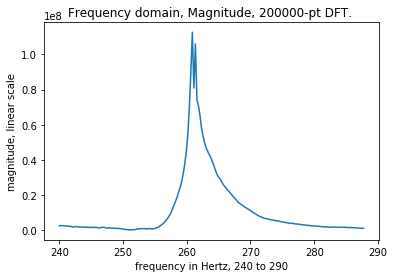

In [11]:
Xm = fft(signal2) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 5:  Magnitude of DFT of audio clip, 240 to 290 Hz.
plt.figure(5)
plt.title("Frequency domain, Magnitude, 200000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 240 to 290')
plt.plot(Freq[1000:1200], abs(Xm)[1000:1200])
plt.show()

The maximal frequency is between 255 to 270 Hz. The only note in this range is C4, which is 261.63 Hz. It also has harmonic series at 522 Hz, 783 Hz and 1044 Hz.

(2) Use the DFT for frequency analysis of the fifth "sound" in the file (apart from the somewhat noisy silence).   (There are five more sounds after this, just to double-check that you're using the correct one).  Can you identify which note(s)?

In [12]:
index51 =  1480000
index52 = index51 + 192000# this would be a 192000 * ts time period 

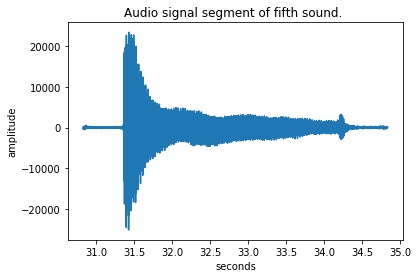

In [13]:
# Figure 6:  amplitude of fifth sound.
plt.figure(6)
plt.title("Audio signal segment of fifth sound. ")
Time3 = Time[index51:index52]
signal3 = signal[index51:index52]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time3, signal3)
plt.show()

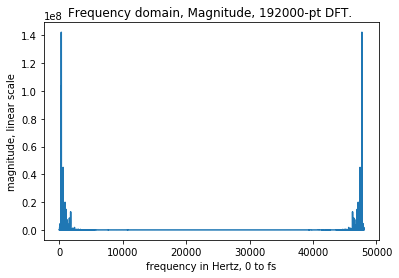

In [14]:
Xm = fft(signal3) # Take 192000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 7:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(7)
plt.title("Frequency domain, Magnitude, 192000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

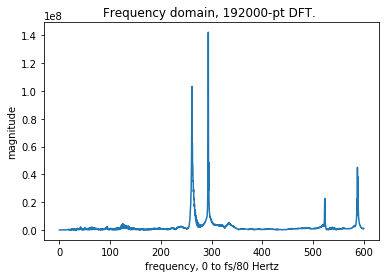

In [15]:
Xm = fft(signal3) # Take 192000-point DFT of signal clip

# Figure 8:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 80 # zoom = 80 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freq = np.linspace(0, fs/zoom, len(Xm_half))

plt.figure(8)
plt.title("Frequency domain, 192000-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/80 Hertz')
plt.plot(Freq, abs(Xm_half))
plt.show()

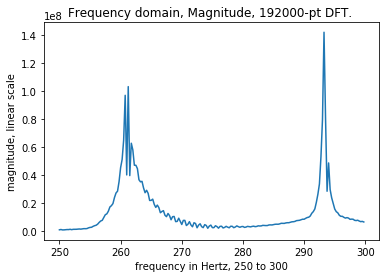

In [16]:
Xm = fft(signal3) # Take 192000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 9  Magnitude of DFT of audio clip, 250 to 300 Hz.
plt.figure(9)
plt.title("Frequency domain, Magnitude, 192000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 250 to 300')
plt.plot(Freq[1000:1200], abs(Xm)[1000:1200])
plt.show()

The fifth sound is composed of two notes. They are C4 (261.63 Hz) and D4 (293.66). It also has harmonic series at 522 Hz and 586 Hz.

(3) With (2) demonstrate

2048-pt version DFT

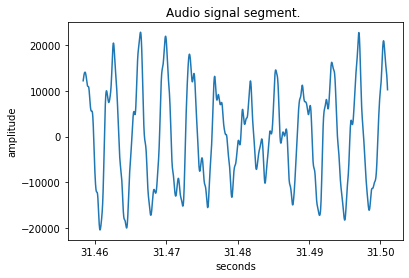

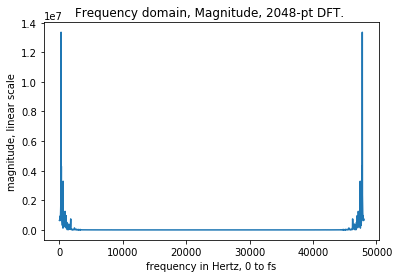

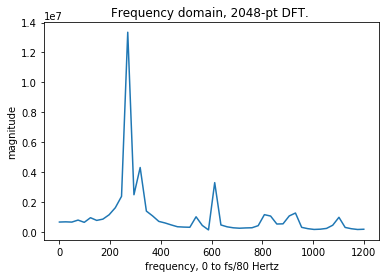

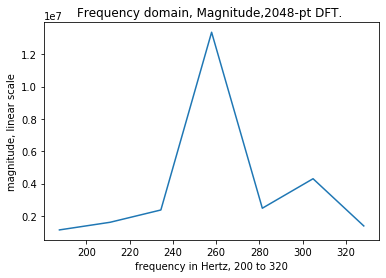

In [17]:
index53 =  1510000
index54 = index53 + 2048# this would be a 2048 * ts time period 
# Figure 10:  amplitude of fifth "sound".
plt.figure(10)
plt.title("Audio signal segment. ")
Time4 = Time[index53:index54]
signal4 = signal[index53:index54]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time4, signal4)
plt.show()

Xm = fft(signal4) # Take 2048-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 11:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(11)
plt.title("Frequency domain, Magnitude, 2048-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

Xm = fft(signal4) # Take 2048-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 12:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 40 # zoom = 40 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freqhalf = np.linspace(0, fs/zoom, len(Xm_half))

plt.figure(12)
plt.title("Frequency domain, 2048-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/80 Hertz')
plt.plot(Freqhalf, abs(Xm_half))
plt.show()

Xm = fft(signal4) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 13  Magnitude of DFT of audio clip, 200 to 320 Hz.
plt.figure(13)
plt.title("Frequency domain, Magnitude,2048-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 200 to 320')
plt.plot(Freq[8:15], abs(Xm)[8:15])
plt.show()

(a) a 256-pt DFT sequence and plots; generate magnitude and phase.

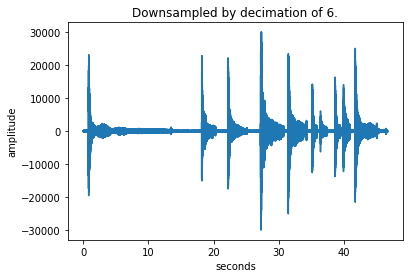

In [18]:
# Note frequencies:
# https://en.wikipedia.org/wiki/Piano_key_frequencies
# May use these to check which you think are played here.
# 48 kHz is overkill for sampling here, even for the major harmonics.
# Below is a simple example of downsampling via the simplest method, decimation.
# Decimation requires and even integer division of the two sample rates being converted.
# In this example, 48 kHz to 8 kHz is a decimation rate of 6.
# This takes advantage of some optimized Numpy methods for "re-shaping" in order to re-sample quickly.

dR = 6  #decimation rate

# Truncate last few samples if would not divide evenly.
integerLength_dR = int(len(signal)/dR) * dR
signalr = signal[0:integerLength_dR]

# Change 1D array of N-length time sequence into an (N/6) x 6 2D matrix.
signalDS = signalr.reshape(int(len(signal)/dR), dR)  

# Then take just the first column, resulting in every sixth sample.
signalDS = signalDS[:,0]

# Update sample rate for downsampled rate.
fs_ds = fs/dR

# Figure 14 -- amplitude of decimated time sequence, now with fs = 8 kHz.
plt.figure(14)
TimeDS = np.linspace(0, len(signalDS) / fs_ds, num=len(signalDS))
plt.title('Downsampled by decimation of 6.')
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(TimeDS, signalDS)
plt.show()

# The plot should be unnoticeably different at this scale.

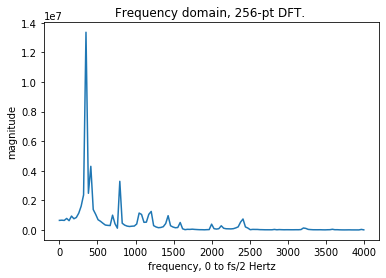

In [19]:

signalDSseg = signalDS[int(index53/6):int(index53/6)+2048]
Xm5256 = fft(signalDSseg[0:255], 256)
zoom = 2 # zoom = 2 would just show non-redundant first half below folding freq
Xm_half5256 = Xm[0:int((len(Xm5256)/zoom)-1)]
Freq5256 = np.linspace(0, fs_ds/zoom, len(Xm5256))
Freq5256half = np.linspace(0, fs_ds/zoom, len(Xm_half5256))

plt.figure(15)
plt.title("Frequency domain, 256-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/2 Hertz')
plt.plot(Freq5256half, abs(Xm_half5256))
plt.show()


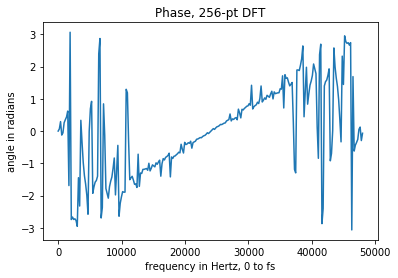

In [20]:

Freq5256 = np.linspace(0, fs, len(Xm5256))
# Figure 16: Phase of DFT of audio clip.
plt.figure(16)
plt.title("Phase, 256-pt DFT")
plt.ylabel('angle in radians')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq5256, np.angle(Xm5256))

(b) a zero-padded version of the same for a total of 2048-pts,  Only a plot of magnitude is sufficient.

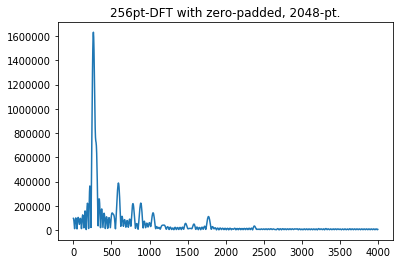

In [21]:
someZeros = np.zeros(2048-256)
zpSignal2 = np.append(signalDSseg[0:255], someZeros) # zero pad example, using just first 128 x(n) of down-sampled clip
zpXm = fft(zpSignal2)
zpXm_half = zpXm[0:int((len(zpXm)/zoom)-1)]

Freq = np.linspace(0, fs_ds/zoom, len(zpXm_half))

plt.figure(17)
plt.title("256pt-DFT with zero-padded, 2048-pt.")
plt.plot(Freq, abs(zpXm_half))
plt.show()

(c) and a full 2048-pt resolution DFT using 2048 samples from that sound clip segment.  Only a plot of magnitude is sufficient.

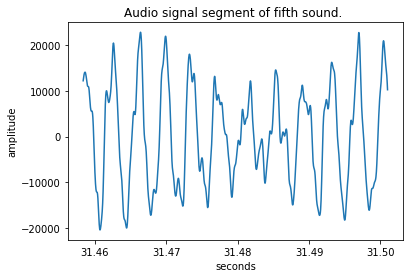

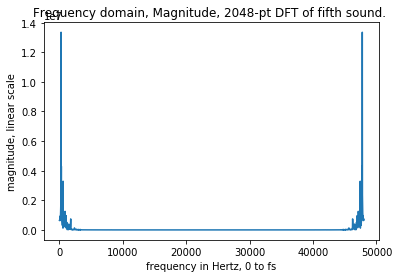

In [22]:
index53 =  1510000
index54 = index53 + 2048# this would be a 2048 * ts time period 
# Figure 18:  amplitude of fifth "sound".
plt.figure(18)
plt.title("Audio signal segment of fifth sound. ")
Time4 = Time[index53:index54]
signal4 = signal[index53:index54]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time4, signal4)
plt.show()

Xm = fft(signal4) # Take 2048 -point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 19:  Magnitude of 2048-pt fifth sound, 0 to fs Hz.
plt.figure(19)
plt.title("Frequency domain, Magnitude, 2048-pt DFT of fifth sound. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

(4) Demonstrate a Hann and Hamming windowed version similar to (3)(a), applying each windowing technique to the original 256 sequence values and then demonstrating the DFT magnitude.

Text(0.5, 1.0, 'Hanning window. ')

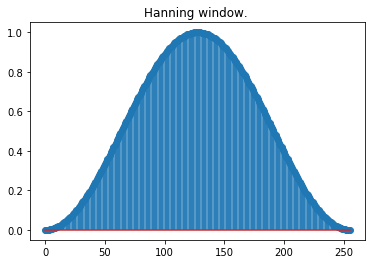

In [23]:
#hanning window
plt.figure(20)
x = np.arange(256)
yhann = np.hanning(256)
plt.stem(x, yhann, use_line_collection=True)
plt.title("Hanning window. ")

C:\software\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


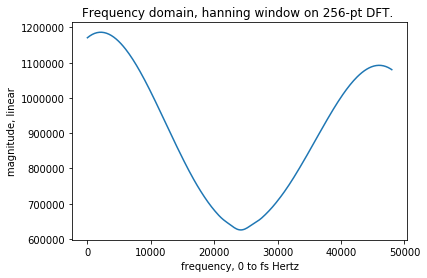

In [24]:
resultHann = np.convolve(Xm5256, yhann, mode='same') 
plt.figure(21)
plt.title("Frequency domain, hanning window on 256-pt DFT. ")
plt.ylabel('magnitude, linear')
plt.xlabel('frequency, 0 to fs Hertz')
plt.plot(Freq5256, resultHann)
plt.show()

Text(0.5, 1.0, 'Hammng window. ')

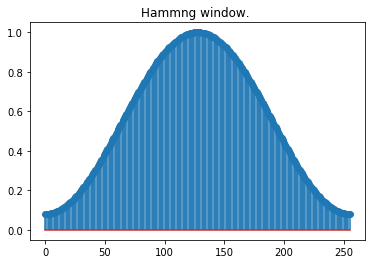

In [25]:
#hamming window
plt.figure(22)
x = np.arange(256)
yhamm = np.hamming(256)
plt.stem(x, yhamm, use_line_collection=True)
plt.title("Hammng window. ")

C:\software\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


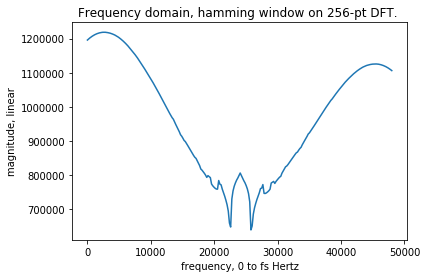

In [26]:
resultHamm = np.convolve(Xm5256, yhamm, mode='same') 
plt.figure(23)
plt.title("Frequency domain, hamming window on 256-pt DFT. ")
plt.ylabel('magnitude, linear')
plt.xlabel('frequency, 0 to fs Hertz')
plt.plot(Freq5256, resultHamm)
plt.show()

(5) Demonstrate (4) on a log-scale plot rather than a linear-scale.

C:\software\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


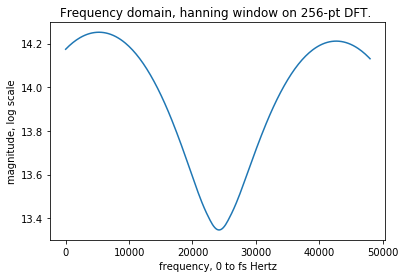

In [27]:
logresultHann =  np.log(resultHann)
plt.figure(24)
plt.title("Frequency domain, hanning window on 256-pt DFT. ")
plt.ylabel('magnitude, log scale')
plt.xlabel('frequency, 0 to fs Hertz')
plt.plot(Freq5256, logresultHann)
plt.show()

C:\software\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


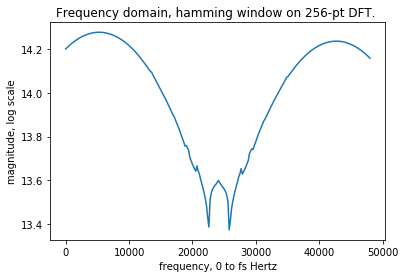

In [28]:
logresultHamm =  np.log(resultHamm)
plt.figure(25)
plt.title("Frequency domain, hamming window on 256-pt DFT. ")
plt.ylabel('magnitude, log scale')
plt.xlabel('frequency, 0 to fs Hertz')
plt.plot(Freq5256, logresultHamm)
plt.show()

(6) Write your observations to conclude your notebook to submit.

The first sound is C4, which is 261.63 Hz. It also has harmonic series at 522 Hz, 783 Hz and 1044 Hz.
The fifth sound is composed of two notes. They are C4 (261.63 Hz) and D4 (293.66). It also has harmonic series at 522 Hz and 586 Hz.

###### (7) Use the DFT and at least magnitude plots to analyze the very last "sound" in the sound file?  (It's the most discordant of the sounds in the file).

In [29]:
index101 =  1980000
index102 = index101 + 200000# this would be a 200000 * ts time period 

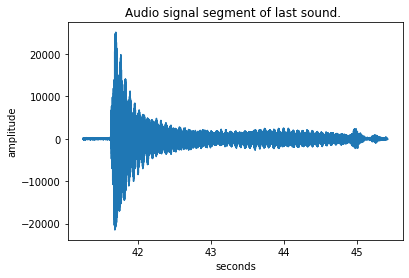

In [30]:
# Figure 26:  amplitude of last "sound".
plt.figure(26)
plt.title("Audio signal segment of last sound. ")
Time4 = Time[index101:index102]
signal4 = signal[index101:index102]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time4, signal4)
plt.show()

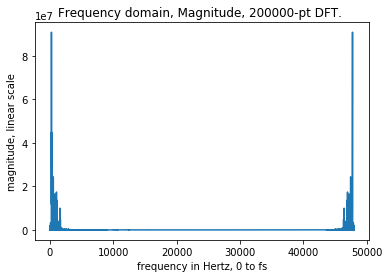

In [31]:
Xm = fft(signal4) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 27:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(27)
plt.title("Frequency domain, Magnitude, 200000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

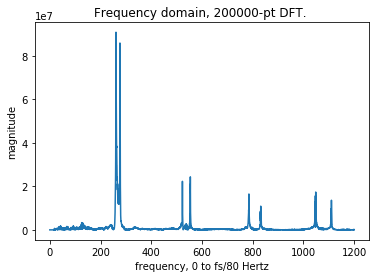

In [32]:
Xm = fft(signal4) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 28:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 40 # zoom = 40 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freq = np.linspace(0, fs/zoom, len(Xm_half))

plt.figure(28)
plt.title("Frequency domain, 200000-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/80 Hertz')
plt.plot(Freq, abs(Xm_half))
plt.show()

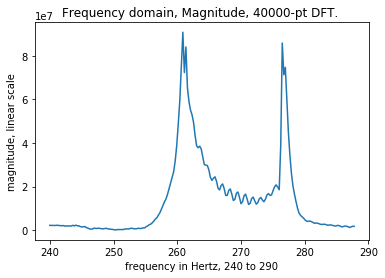

In [33]:
Xm = fft(signal4) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 29  Magnitude of DFT of audio clip, 240 to 290 Hz.
plt.figure(29)
plt.title("Frequency domain, Magnitude, 40000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 240 to 290')
plt.plot(Freq[1000:1200], abs(Xm)[1000:1200])
plt.show()

(8) Can you identify which note(s) are played?

They are C4 (261.63 Hz) and C#4/Db4 (277.18 Hz).

(9) What is the least computationally expensive manner that you can use to distinguish the note(s)?  What did you choose and how did it assist while not using as much calculation?  Can you support your identification and efficient calculation with DFT-magnitude plots?

I can use FFT and downsampling to save computational cost. Unfortunately, the 256 pt DFT can not show the correct notes.  

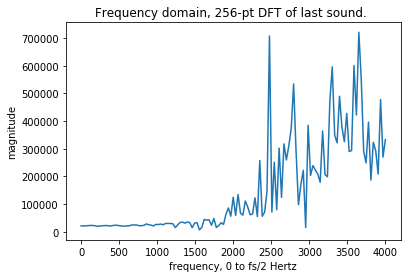

In [34]:
index103 =  2026000
signalDSseg1 = signalDS[int(index103/6):int(index103/6)+2048]
Xm10256 = fft(signalDSseg1[0:255], 256)
zoom = 2 # zoom = 2 would just show non-redundant first half below folding freq
Xm_half10256 = Xm[0:int((len(Xm10256)/zoom)-1)]
Freq10256 = np.linspace(0, fs_ds/zoom, len(Xm10256))
Freq10256half = np.linspace(0, fs_ds/zoom, len(Xm_half10256))

plt.figure(30)
plt.title("Frequency domain, 256-pt DFT of last sound. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/2 Hertz')
plt.plot(Freq10256half, abs(Xm_half10256))
plt.show()

(10) Approximate the signal to noise ratio (SNR for the overall sound file.  You cannot fully separate the signal (piano tones) from the background, but it is okay here to approximate the combined signal versus the noise  for your SNR calculation.  Explain your calculation and result in your notebook.

In [35]:
signal_power = np.square(np.int64(signal))
#noise power
noise_power = np.sum(signal_power[696800:840000])/(840000-696800)
#signal power
signal_power = (np.sum(signal_power) - np.sum(signal_power[696800:840000])) / (len(signal_power) - (840000-696800))
#SNR
SNR = signal_power / noise_power
print(SNR)

668.1790662851488


(11) Can you identify and support with DFT-magnitude plots the notes in the chord played in the fourth "sound" in the file?  Support your answer in your notebook.

In [36]:
index41 =1250000
index42 = index41 + 200000# this would be a 200000 * ts time period 

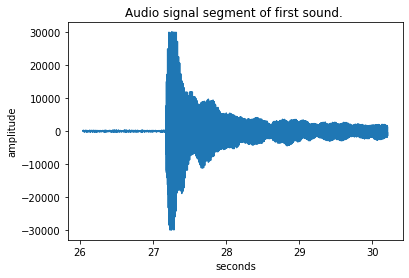

In [37]:
# Figure 31:  amplitude of first sound'.
plt.figure(31)
plt.title("Audio signal segment of first sound. ")
Time5 = Time[index41:index42]
signal5 = signal[index41:index42]
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.plot(Time5, signal5)
plt.show()

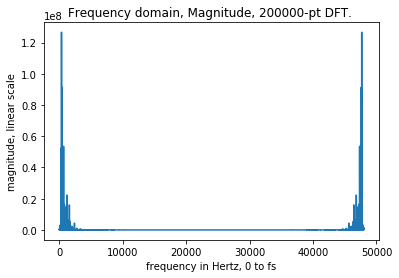

In [38]:
Xm = fft(signal5) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 32:  Magnitude of DFT of audio clip, 0 to fs Hz.
plt.figure(32)
plt.title("Frequency domain, Magnitude, 200000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 0 to fs')
plt.plot(Freq, abs(Xm))
plt.show()

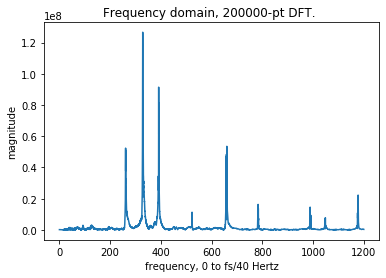

In [39]:
Xm = fft(signal5) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 33:  Magnitude of DFT of audio clip, 0 to fs Hz.
zoom = 40 # zoom = 40 would just show non-redundant first half below folding freq
Xm_half = Xm[0:int((len(Xm)/zoom)-1)]
Freq = np.linspace(0, fs/zoom, len(Xm_half))

plt.figure(33)
plt.title("Frequency domain, 200000-pt DFT. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/40 Hertz')
plt.plot(Freq, abs(Xm_half))
plt.show()

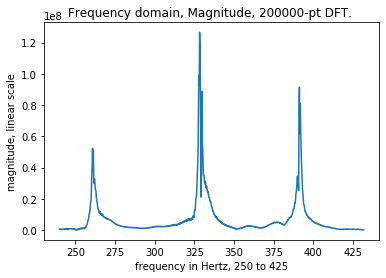

In [40]:
Xm = fft(signal5) # Take 200000-point DFT of signal clip
Freq = np.linspace(0, fs, len(Xm))
# Figure 34  Magnitude of DFT of audio clip, 240 to 290 Hz.
plt.figure(34)
plt.title("Frequency domain, Magnitude, 200000-pt DFT. ")
plt.ylabel('magnitude, linear scale')
plt.xlabel('frequency in Hertz, 250 to 425')
plt.plot(Freq[1000:1800], abs(Xm)[1000:1800])
plt.show()

 The fouth sound is a combination of different notes. They are C4 (261.6 Hz), E4 (329.6 Hz) and G4 (391.9 Hz).